## Part 1: NumPy - The Bedrock of Numerical Methods

In [1]:
import numpy as np

### A. The Core Component: The ndarray

In [ ]:
# np.array(list_object, dtype=None)
# list_object: A Python list or list-of-lists.
# dtype: (Optional) Specifies the data type (e.g., np.float64, np.int32). If you don't specify it, NumPy will intelligently guess the best type.

# 1D Array (Vector): define your x and y data points.
data_x = np.array([-0.75, 0.5, 1.5])
data_y = np.array([1, 2, 2])

print(data_x, type(data_y), data_y.dtype, data_x.dtype) # Notice NumPy chose float64 for you
print("_____________________________________________________________________________________________________\n")


# 2D Array (Matrix): define your augmented matrix.
A = np.array([
    [1,2,1],
    [1,-2,1],
    [2,12,-2]
])

print("(rows, columns) of A =", A.shape)
print('Number of dimentions =', A.ndim)

[-0.75  0.5   1.5 ] <class 'numpy.ndarray'> int64 float64
_____________________________________________________________________________________________________

(rows, columns) of A = (3, 3)
Number of dimentions = 2


In [ ]:
# np.zeros(shape): often need to create a matrix of a specific size before knowing what values will go into it; can't just declare an empty matrix; create a matrix of zeros and then populate it.
# shape: A number (for a 1D array) or a tuple of numbers (for a multi-dimensional array) defining the size. (rows, columns).

# Preparing the Vandermonde matrix
num_nodes = 3
vandermonde_matrix = np.zeros((num_nodes, num_nodes))
print(vandermonde_matrix)
print("_____________________________________________________________________________________________________\n")

# Preparing the Divided Difference table
num_points = 4
# This will be a 4x4 matrix to hold f[x0], f[x0,x1], etc.
div_diff_table = np.zeros((num_points, num_points))
print(div_diff_table)
print("_____________________________________________________________________________________________________\n")

# Preparing the result array for Lagrange Interpolation
num_results = 5
p_x_results = np.zeros(num_results)
print(p_x_results)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
_____________________________________________________________________________________________________

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
_____________________________________________________________________________________________________

[0. 0. 0. 0. 0.]


In [ ]:
# np.linspace(start, stop, num_points): To prove polynomial interpolation works, must plot it. A plot is a series of closely-spaced points connected by lines; generate those points: linspace.
# start: The starting value of the sequence.
# stop: The end value of the sequence. Crucially, this value is included in the array.
# num_points: The number of samples to generate.

# Creating x-values for a smooth plot of the interpolating polynomial. The original data points might be -3 and 3.
x_plot = np.linspace(-3, 3, 10) # Using 10 points to see them clearly
print(x_plot)
print("_____________________________________________________________________________________________________\n")

# Investigating the effect of step size 'h' on differentiation error
# We want to test h values from 1 down to something very small.
# A linear space isn't good here, because we want more points near zero.
# So we use its cousin, logspace (good for life skill, but I'll focus on linspace for the labs).
# But let's create a linear space of h values for practice.

h_values = np.linspace(1.0, 0.01, 5)
print(h_values)

[-3.         -2.33333333 -1.66666667 -1.         -0.33333333  0.33333333
  1.          1.66666667  2.33333333  3.        ]
_____________________________________________________________________________________________________

[1.     0.7525 0.505  0.2575 0.01  ]


### B. Array Manipulation & Slicing - The Scalpel

In [ ]:
# 1D Array: arr[index] (gets an element), arr[start:stop:step] (gets a sub-array).
# 2D Array (Matrix): arr[row, column] (gets an element), arr[row_slice, col_slice] (gets a sub-matrix).

#__________________________________________________________________________________________________________________________________________________________
# Context:

# (Gaussian Elimination): core of the algorithm: A[j] = A[j] - (m * A[i]) where A[j] and A[i] are not single numbers; they are rows of the matrix.
# You are subtracting a multiple of one row from another in a single operation. This is vectorization in action.

# (Newton's Divided Difference): The formula to calculate the divided difference table is b[i][j] = (b[i+1][j-1] - b[i][j-1]) / (x[i+j] - x[i]).
# This requires you to precisely access elements from the previous column (j-1) and different rows (i and i+1) to compute the current value.

# (Lagrange Polynomials): The inner loop calculates the basis polynomial l_k. A key part of that is the denominator (self.data_x[k] - self.data_x[i]).
# You are constantly grabbing specific x values from your data array using their indices.
#__________________________________________________________________________________________________________________________________________________________

x_data = np.array([-3, -2., -1., 0, 1, 2., 3., 4])
print('x_0 =', x_data[0], '==', x_data[-len(x_data)]) # get first element

print('x_n =', x_data[-1], '==', x_data[len(x_data)-1]) # get the last element
print("_____________________________________________________________________________________________________\n")

# Get the slice x_2, x_3, x_4
print(x_data[2:5])

# Get every second element excluding the first and the last
print(x_data[1 : -1 : 2])

# Get the entire array in reverse
print(x_data[::-1])

x_0 = -3.0 == -3.0
x_n = 4.0 == 4.0
_____________________________________________________________________________________________________

[-1.  0.  1.]
[-2.  0.  2.]
[ 4.  3.  2.  1.  0. -1. -2. -3.]


In [ ]:
#augmented matrix A:
A = np.array([[1.0, 2.0, 1.0, 0.0],
              [1.0, -2.0, 2.0, 4.0],
              [2.0, 12.0, -2.0, 4.0]])

# Get a single element: row 1, column 2 (0-indexed)
print(A[1, 2])

# Get the pivot element in the first step of Gaussian Elimination (A[0,0])
pivot = A[0, 0]
print(pivot)
print("_____________________________________________________________________________________________________\n")

# Get the first row (row 0)
print(A[0, :]) # The ':' simply means "all columns"

# Note: You can also just use A[0] as a shortcut for 2D arrays
print("First row (shortcut):", A[0])
print("_____________________________________________________________________________________________________\n")

# Get the solution vector 'b' (the last column), but with only last two row elements
print(A[-2:, -1])

2.0
1.0
_____________________________________________________________________________________________________

[1. 2. 1. 0.]
First row (shortcut): [1. 2. 1. 0.]
_____________________________________________________________________________________________________

[4. 4.]


In [ ]:
# --- ALGORITHM IMPLEMENTATION ---
# Let's simulate one step of Gaussian Elimination for the second row (j=1)
# m = A[j,i] / A[i,i]  where j=1, i=0
# m = A[1,0] / A[0,0]

m = A[1, 0] / A[0, 0]
print("Multiplier m:", m)

# The core operation: A[j,:] = A[j,:] - m * A[i,:]
# Which is A[1,:] = A[1,:] - m * A[0,:]
A[1, :] = A[1, :] - m * A[0, :] # This modifies the array IN-PLACE

print("Matrix A after one elimination step:\n", A)
# Notice how A[1,0] is now zero. You've performed a row operation.
print("_____________________________________________________________________________________________________\n")

# Slicing a sub-matrix: Get the top-left 2x2 matrix
sub_matrix = A[0:2, 0:2]
print("Top-left 2x2 sub-matrix:\n", sub_matrix)
print("_____________________________________________________________________________________________________\n")

coefficients = np.diag(A)
print(coefficients)

Multiplier m: 0.0
Matrix A after one elimination step:
 [[ 1.  2.  1.  0.]
 [ 0. -4.  1.  4.]
 [ 2. 12. -2.  4.]]
_____________________________________________________________________________________________________

Top-left 2x2 sub-matrix:
 [[ 1.  2.]
 [ 0. -4.]]
_____________________________________________________________________________________________________

[ 1. -4. -2.]


In [ ]:
# Logical Indexing (arr[condition]): Instead of providing indices, you provide a condition. NumPy returns only the elements that satisfy the condition.
# It's the standard way to handle data cleaning and analysis. For example, if you had error values, you could instantly select all the errors above a certain threshold.

f_m_values = np.array([1.18, -1.38, -0.04, 0.61, 0.29]) # f(m) values from bisection

# Find all the positive values of f(m). These are intervals where the root is NOT between a and m
positive_f_m = f_m_values[f_m_values > 0]
print(positive_f_m)

# Find all values whose absolute value is close to zero (e.g., < 0.1). This tells us which 'm' is closest to being a root.
close_to_root = f_m_values[np.abs(f_m_values) < 0.1]
print(close_to_root)

[1.18 0.61 0.29]
[-0.04]


### C. Mathematical & Linear Algebra Operations - The Engine Room

In [ ]:
# Element-wise Operations (e.g. Instead of writing a for loop to add 10 to every element in an array, you just write arr + 10.
# NumPy applies the operation to every single element simultaneously at the C-code level.)

#___________________________________________________________________________________________________________________________________________________________________________________________
# context:
# (Differentiation): The formulas for forward, backward, and central differences are perfect examples. (f(x+h) - f(x-h)) / (2*h) is not calculated for a single x.
# It's calculated for an entire np.linspace array of x values at once. This is what makes plotting the derivative so easy.

# When you evaluate a polynomial like p(x) = 5x^4 + 2x^2 + 1, you don't loop. You write 5*x**4 + 2*x**2 + 1, where x is an array of points. The result y will be an array of the same size.
#___________________________________________________________________________________________________________________________________________________________________________________________

# A linspace array for plotting
x_values = np.linspace(0, 2, 5)
# Let's evaluate y = 3x^2 + 2 for all x_values at once.
y_values = 3*x_values**2 + 2
print(x_values, '\t\t', y_values)

print("_____________________________________________________________________________________________________\n")

# Central Difference for f(x) = x^3 at all x_values
f = lambda x: x**3
h = 0.1

df_dx = (f(x_values + h) - f(x_values - h)) / (2 * h)

print("Original x_values:", x_values)
print("Derivative (3x^2) at these points:", df_dx)

[0.  0.5 1.  1.5 2. ] 		 [ 2.    2.75  5.    8.75 14.  ]
_____________________________________________________________________________________________________

Original x_values: [0.  0.5 1.  1.5 2. ]
Derivative (3x^2) at these points: [1.000e-02 7.600e-01 3.010e+00 6.760e+00 1.201e+01]


In [ ]:
# np.dot(A, b) is the function for matrix multiplication. A more modern and readable syntax is the @ operator. Both are used heavily.

#___________________________________________________________________________________________________________________________________________________________________________________________
# context:
# (Inverse Matrix Method): After you find A_inv (the inverse of the Vandermonde matrix), the final step to find the coefficients a is a = np.dot(A_inv, y).
# (Gaussian Elimination): This lab also features the inverse matrix method as a comparison, using the exact same operation.
#___________________________________________________________________________________________________________________________________________________________________________________________

# Suppose we've already found the inverse of our 3x3 matrix.
A_inv = np.array([[ 0.5, -1.  ,  0.5 ],
                  [-0.2,  1.4 , -0.8 ],
                  [ 0.1, -0.2 ,  0.1 ]])

# And we have our y-values (the 'b' vector in Ax=b)
y_vector = np.array([1.87, 2.20, 2.44])

# Find the coefficient vector 'a' where a = A_inv * y
# Method 1: Using np.dot()
coeffs_a = np.dot(A_inv, y_vector)

# Method 2: Using the @ operator (more modern and often preferred)
coeffs_b = A_inv @ y_vector

print("Coefficients using np.dot():", coeffs_a)
print("Coefficients using @:", coeffs_b)

Inverse Matrix A_inv:
 [[ 0.5 -1.   0.5]
 [-0.2  1.4 -0.8]
 [ 0.1 -0.2  0.1]]
Vector y:
 [1.87 2.2  2.44]
Coefficients using np.dot(): [-0.045  0.754 -0.009]
Coefficients using @: [-0.045  0.754 -0.009]


In [ ]:
# np.linalg.inv() and np.linalg.det(): linear algebra tools from NumPy's linear algebra sub-package (linalg).

#___________________________________________________________________________________________________________________________________________________________________________________________
# context:
# The inverse matrix method is entirely dependent on np.linalg.inv().
# Good Practice: A matrix only has an inverse if it is "non-singular." The way to check this is to see if its determinant is non-zero.
# np.linalg.det() is the tool for this. A robust program always checks the determinant before trying to calculate an inverse.
#___________________________________________________________________________________________________________________________________________________________________________________________

# The coefficient matrix
A = np.array([[1, 2, 1],
              [1, -2, 2],
              [2, 12, -2]])

# First, a crucial check. Can we even invert this?
determinant = np.linalg.det(A)
print(f"--- Determinant of A: {determinant:.2f} ---")

if determinant == 0:
    print("Matrix is singular, cannot compute inverse.")
else:
    print("Matrix is non-singular, we can find an inverse.")
    A_inv = np.linalg.inv(A)
    print("The inverse of A is:\n", A_inv)

--- Determinant of A: 8.00 ---
Matrix is non-singular, we can find an inverse.
The inverse of A is:
 [[-2.5    2.     0.75 ]
 [ 0.75  -0.5   -0.125]
 [ 2.    -1.    -0.5  ]]


In [ ]:
# numpy.polynomial.Polynomial : This is a class, not just a function.

#___________________________________________________________________________________________________________________________________________________________________________________________
# context:
# To create your own Polynomial class, the numpy.polynomial.Polynomial class is the professional, built-in version of what you are asked to build.
# (Differentiation): The .deriv() method: Instead of manually implementing differentiation rules, you create the polynomial object and just ask for its derivative.
# (Root Finding): The .roots() method finds all roots of the polynomial for you instantly.
#___________________________________________________________________________________________________________________________________________________________________________________________

from numpy.polynomial import Polynomial

# Define a polynomial p(x) = 2 + 0.5x - 6x^2 - 2x^3 + 2.5x^4 + x^5
# Note: The coefficients are given from lowest degree to highest.
coeffs = np.array([2.0, 0.5, -6.0, -2.0, 2.5, 1.0])
p = Polynomial(coeffs)

print("--- The Polynomial Object ---")
print("Polynomial p(x):", p)

# Evaluate the polynomial at x=1.5
value_at_x = p(1.5)
print(f"\np(1.5) = {value_at_x:.4f}")

# Evaluate for an entire array of x values
x_vals = np.array([0, 1, 2])
y_vals = p(x_vals)
print("p evaluated for [0, 1, 2]:", y_vals)

print("_____________________________________________________________________________________________________\n")

# Get the derivative polynomial, p'(x)
p_prime = p.deriv()
print("Derivative p'(x):", p_prime)

# Find all the roots of the polynomial (where p(x)=0)
roots = p.roots()
print("\nRoots of p(x):", roots)
# Note: it finds both real and complex roots.

--- The Polynomial Object ---
Polynomial p(x): 2.0 + 0.5·x - 6.0·x² - 2.0·x³ + 2.5·x⁴ + 1.0·x⁵

p(1.5) = 2.7500
p evaluated for [0, 1, 2]: [ 2. -2. 35.]
_____________________________________________________________________________________________________

Derivative p'(x): 0.5 - 12.0·x - 6.0·x² + 10.0·x³ + 5.0·x⁴

Roots of p(x): [-2.22027583 -1.61803399 -0.65499178  0.61803399  1.37526761]


## Part 2: Pandas - The Presenter

In [5]:
import pandas as pd

In [3]:
'''
The Syntax:
pd.DataFrame(dictionary_object)
dictionary_object: A Python dictionary where keys are the column names and values are lists of the data for that column. Crucially, all lists must have the same length.

Why It's Critical:
(Bisection Method): The core of the bisection method is a loop where you update the values of a, b, and m. Your lab file instructs you to create empty lists and append to them in each iteration.
list_a.append(a)
list_b.append(b)
list_m.append(m)
list_f.append(f(m))
After the loop finishes, you can bundle these lists into a dictionary and then into a DataFrame to see the entire history of your calculation in a clean, beautiful table.
This is essential for debugging and for demonstrating that your algorithm is working correctly.
'''

# Imagine these are the lists you filled during the bisection loop.
list_a = [-0.5, 0.4, 0.4, 0.5125]
list_b = [1.3, 1.3, 0.85, 0.625]
list_m = [0.4, 0.85, 0.625, 0.56875]
list_f_m = [1.186, -1.389, -0.042, 0.296]

# Step 1: Combine the lists into a dictionary. The keys become column headers.
iteration_data = {
    "a_k": list_a,
    "b_k": list_b,
    "m_k": list_m,
    "f(m_k)": list_f_m
}

# Step 2: Create the DataFrame from the dictionary.
bisection_df = pd.DataFrame(iteration_data)

# Step 3: Display it!
print("--- Bisection Method Iteration Table (Lab 6) ---")
display(bisection_df)

--- Bisection Method Iteration Table (Lab 6) ---


,a_k,b_k,m_k,f(m_k)
0,-0.5000,1.300,0.40000,1.186
1,0.4000,1.300,0.85000,-1.389
2,0.4000,0.850,0.62500,-0.042
3,0.5125,0.625,0.56875,0.296


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Data Inspection (.head(), .info(), .describe())

'''
This is the main focus of the "Data Analysis" section. You're given a CSV file and asked to explore it.
.head(n): Shows you the first n rows. It's the first thing you should always do to see what the data looks like.
.info(): Gives you the data types of each column and tells you if there are any missing values (e.g., "164 non-null" out of 169 entries for 'Calories'). This is crucial for data cleaning.
.describe(): Instantly calculates key statistics like mean, standard deviation, min, max, and quartiles for all numerical columns. This gives you a feel for the scale and distribution of your data.
'''

try:
    df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSE (My courses)/Numerical methods/Lab/Lab 1/lab1_data.csv')

    print("--- First 5 rows using .head() ---")
    display(df.head())
    print("\n" + "-" * 50 + "\n")

    print("--- Data summary using .info() ---")
    df.info()
    print("\n" + "-" * 50 + "\n")

    print("--- Statistical description using .describe() ---")
    display(df.describe())
    print("-" * 50)

except FileNotFoundError:
    print("Please make sure 'lab1_data.csv' is uploaded to your Colab environment.")

--- First 5 rows using .head() ---


,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0



--------------------------------------------------

--- Data summary using .info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Pulse     169 non-null    int64  
 2   Maxpulse  169 non-null    int64  
 3   Calories  164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 5.4 KB

--------------------------------------------------

--- Statistical description using .describe() ---


,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


--------------------------------------------------


--- Data for plotting ---
       a_k    b_k       m_k  iteration
0 -0.50000  1.300  0.400000          0
1  0.40000  1.300  0.850000          1
2  0.40000  0.850  0.625000          2
3  0.51250  0.625  0.568750          3
4  0.56875  0.625  0.596875          4

--------------------------------------------------



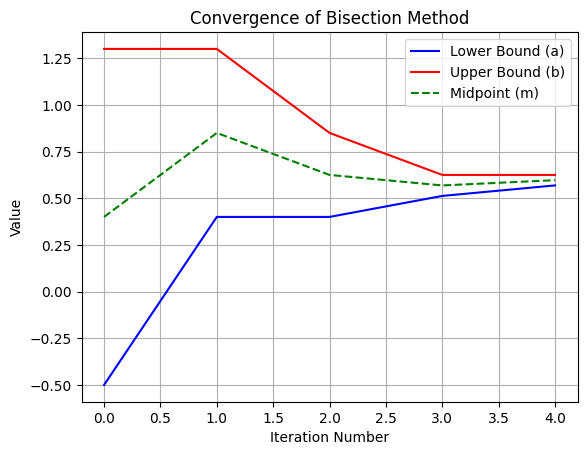

In [ ]:
# .plot(): Pandas has built-in plotting capabilities that are simple wrappers around the matplotlib library.

'''
The Syntax:
df.plot(kind='...', x='col_name', y='col_name')
kind: The type of plot, e.g., 'line', 'scatter', 'hist'.
x, y: The column names to use for the axes.

Why It's Critical:
The file shows you how to generate scatter plots and histograms directly from the DataFrame. df.plot(kind='scatter', x='Duration', y='Calories') is far simpler than
importing matplotlib and writing plt.scatter(df['Duration'], df['Calories']). It's a fantastic shortcut for EDA.
'''

import matplotlib.pyplot as plt

# We'll use the cleaned-up bisection data from our first code block
list_a = [-0.5, 0.4, 0.4, 0.5125, 0.56875]
list_b = [1.3, 1.3, 0.85, 0.625, 0.625]
list_m = [0.4, 0.85, 0.625, 0.56875, 0.596875]
iteration_data = {'a_k': list_a, 'b_k': list_b, 'm_k': list_m}

bisection_df = pd.DataFrame(iteration_data)

# Add a column for the iteration number
bisection_df['iteration'] = bisection_df.index

print("--- Data for plotting ---")
print(bisection_df)
print("\n" + "-" * 50 + "\n")

# Plot how the interval [a, b] shrinks over time.
# We'll plot both 'a_k' and 'b_k' on the same graph.
ax = bisection_df.plot(kind='line', x='iteration', y='a_k', color='blue', label='Lower Bound (a)')
bisection_df.plot(kind='line', x='iteration', y='b_k', color='red', label='Upper Bound (b)', ax=ax)
bisection_df.plot(kind='line', x='iteration', y='m_k', color='green', label='Midpoint (m)', style='--', ax=ax)


plt.title("Convergence of Bisection Method")
plt.xlabel("Iteration Number")
plt.ylabel("Value")
plt.grid(True)
plt.show()

In [9]:
# Handle empty cells (df.dropna()) and duplicates (df.drop_duplicates())

# Assuming the lab1_data.csv is loaded and the df variable is working

print(df.shape[0]) # number of rows

df_no_nan = df.dropna() # Created a new DataFrame by dropping rows with NaN values: .dropna() returns a new DataFrame with the NaN rows removed.

print(df_no_nan.shape[0]) # rows after nan dropped

print("_____________________________________________________________________________________________________\n")

cleaned_df = df_no_nan.drop_duplicates() # On the new DataFrame or variable, dropped duplicate rows. The 'inplace=True' argument is NOT used, so we assign the result to a new variable.

print(cleaned_df.shape[0]) # number of rows in the non_duplicate dataframe
print("_____________________________________________________________________________________________________\n")

# If we want to drop NaN and drop duplicates in place,

df1 = df.copy() # taking a copy of the original dataframe as I don't want to change that.

df1.dropna(inplace = True)

print(df1.shape[0])

df1.drop_duplicates(inplace = True)

print(df1.shape[0])

169
164
_____________________________________________________________________________________________________

157
_____________________________________________________________________________________________________

164
157
